In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [269]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, scale
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

Read files

In [2]:
car_train=pd.read_csv("../data/train.csv")
car_test=pd.read_csv("../data/test.csv")

* [Version 1](#section-1)
* [Version 2](#section-2)

In [ ]:
car_train.shape

In [ ]:
car_test.shape

In [ ]:
car_train.head()

In [ ]:
car_train.info()

In [ ]:
car_test.head()

In [ ]:
car_test.info()

In [ ]:
# Remove id column
car_train = car_train.drop('id', axis = 1)

In [186]:
print("Valores únicos en el conjunto de entrenamiento:\n")
for i in car_train.columns:
    print(i, car_train[i].unique())

Valores únicos en el conjunto de entrenamiento:

id [1.000e+00 2.000e+00 3.000e+00 ... 4.817e+03 4.818e+03 4.819e+03]
Nombre ['Maruti Swift Dzire ZDI' 'Maruti Wagon R LXI Optional'
 'Mahindra KUV 100 mFALCON D75 K8' ...
 'Mercedes-Benz E-Class 280 Elegance' 'Honda City Corporate Edition'
 'Porsche Panamera Diesel 250hp']
Ciudad ['G' 'I' 'F' 'E' 'H' 'C' 'J' 'L' 'B' 'K' 'D' nan]
Año [2012. 2016. 2013. 2017. 2009. 2014. 2011. 2015. 2008. 2010. 2018. 2006.
   nan 2019. 2005. 2007. 2003. 2004. 2001. 1998. 2002. 2000. 1999.]
Kilometros [83000.  4800. 26000. ... 60033. 40158. 65743.]
Combustible ['Diesel' 'Petrol' nan 'CNG' 'LPG' 'Electric']
Tipo_marchas ['Manual' 'Automatic' nan]
Mano ['First' 'Second' 'Third' nan 'Fourth & Above']
Consumo ['23.4 kmpl' '20.51 kmpl' '25.32 kmpl' '18.5 kmpl' '18.7 kmpl' '17.8 kmpl'
 '16.8 kmpl' '18.6 kmpl' '25.2 kmpl' '10.91 kmpl' '12.99 kmpl' '17.5 kmpl'
 '25.8 kmpl' '18.25 kmpl' '10.0 kmpl' '11.5 kmpl' '19.1 kmpl' '14.21 kmpl'
 '14.16 kmpl' '17.43 kmpl' '18.

In [ ]:
print("Valores únicos en el conjunto de test:\n")
for i in car_test.columns:
    print(i, car_test[i].unique())

In [ ]:
# find the number of nulls in each colum
car_train.isnull().sum()

In [ ]:
# find the number of nulls in each colum
car_test.isnull().sum()

In [ ]:
car_train.info()

In [ ]:
car_train.nunique()

In [ ]:
car_test.info()

In [ ]:
car_test.nunique()

In [ ]:
car_train.describe()

In [ ]:
print("There is {} duplicated values in data frame".format(car_train.duplicated().sum()))

In [ ]:
car_test.describe()

## Variables continuas

In [ ]:
# Precio
plt.subplot(121)
sns.distplot(car_train['Precio_cat'],color="r");

plt.subplot(122)
car_train['Precio_cat'].plot.box(figsize=(16,5))

plt.show()

In [ ]:
# Kilometros
plt.subplot(121)
sns.distplot(car_train['Kilometros'],color="y");

plt.subplot(122)
car_train['Kilometros'].plot.box(figsize=(16,5))

plt.show()

## Variables Discretas

In [ ]:
sns.countplot(y='Ciudad',data=car_train)
print(car_train.Ciudad.value_counts(normalize=True)*100)

In [ ]:
sns.countplot(x='Mano',data=car_train)
print(car_train.Mano.value_counts(normalize=True)*100)

In [ ]:
sns.countplot(x='Asientos',data=car_train)
print(car_train.Asientos.value_counts())

In [ ]:
sns.countplot(y="Motor_CC", data=car_train, palette="Greens_d",
              order=car_train.Motor_CC.value_counts().iloc[:10].index)

<a id="section-1"></a>
# Versión 1 
Eliminar la mayoría de los duplicados, excepto el descuento que lo rellenamos por la moda, probar Regresión Logística, Lineal y Random Forest

In [ ]:
car_train_1 = car_train.copy()
car_test_1 = car_test.copy()

In [ ]:
car_train_1.head()

In [ ]:
car_train_1.columns

In [ ]:
print("Shape of train data Before dropping any Row: ",car_train_1.shape)
for i in car_train_1.columns:
    if car_train_1[i].isnull().sum() > 0:
        if i == "Descuento":
            car_train_1[i]=car_train_1[i].fillna((car_train_1[i].mode()[0]))
            print("Fill values in " + i + " with the mode: ",car_train[i].mode()[0])
        else:
            car_train_1 = car_train_1[car_train_1[i].notna()]
            print("Shape after dropping nulls in " + i + ":",car_train_1.shape)

In [ ]:
car_test_1['Descuento']=car_test_1['Descuento'].fillna((car_test_1['Descuento'].mode()[0]))

In [ ]:
car_train_1.isnull().sum()

In [ ]:
car_test_1.isnull().sum()

In [ ]:
car_train_1_orig = car_train_1.copy()
car_test_1_orig = car_test_1.copy()

In [ ]:
for i in list(car_train_1.columns):
    if car_train_1[i].dtypes == "object":
        to_read = "../data/" + i.lower() + ".csv"
        label = LabelEncoder().fit(pd.read_csv(to_read)[i])
        car_train_1[i] = label.transform(car_train_1_orig[i])
        car_test_1[i] = label.transform(car_test_1_orig[i])

In [ ]:
correcto = True

for asientos in car_train_1_orig.Asientos.unique():
    label_train = car_train_1.Asientos[car_train_1_orig.Asientos == asientos].unique()
    label_test = car_test_1.Asientos[car_test_1_orig.Asientos == asientos].unique()
    
    if len(label_train)==0 or len(label_test)==0:
        continue
    
    if label_train != label_test:
        print("Error, {} es etiquetado en train como {} y en test como {}".format(asientos, label_train, label_test))
        correcto = False
        break
        
if correcto:
    print("Todo perfecto")

## Modelos

In [ ]:
y = car_train_1['Precio_cat']
x = car_train_1.drop(['Precio_cat'],axis=1)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x, y, random_state=0, test_size=0.2)

In [ ]:
linear_r = LinearRegression()

In [ ]:
linear_score = cross_val_score(linear_r, x_train, y_train, cv=5)

In [ ]:
print(linear_score.mean(), linear_score.std())

In [ ]:
linear_r.fit(x_train,y_train)
linear_pred=linear_r.predict(x_test)
print(linear_pred)
linear_score=r2_score(y_test,linear_pred)

In [ ]:
print(linear_score)

In [ ]:
lr = LogisticRegression()

In [ ]:
lr_score = cross_val_score(lr, x_train, y_train, cv=5)

In [ ]:
print(lr_score.mean(), lr_score.std())

In [ ]:
lr.fit(x_train,y_train)
lr_pred=lr.predict(x_test)
lr_score=r2_score(y_test,lr_pred)

In [ ]:
rfg = RandomForestRegressor()

In [ ]:
rfg_score = cross_val_score(rfg, x_train, y_train, cv=5)

In [ ]:
print(rfg_score.mean(), rfg_score.std())

In [ ]:
rfg.fit(x_train,y_train)
rfg_pred=rfg.predict(x_test)
rfg_score=r2_score(y_test,rfg_pred)

In [ ]:
print(rfg_score)

Generar fichero

In [ ]:
# Ahora predecimos
tests_ids_1 = car_test_1['id']
del car_test_1['id']
predict_1 = rfg.predict(car_test_1)
# Generamos 
df_result = pd.DataFrame({'id': tests_ids_1, 'Precio_cat': np.around(predict_1).astype(int) })
df_result.to_csv("mis_resultados_1.csv", index=False)

In [ ]:
df_result.head()

<a id="section-2"></a>
# Versión 2
Hacer un poco de EDA, dummy variables, drop nan directamente, manipular el dataset, escalar variables, vemos que tenemos bastante skewed data

In [197]:
car_train_2 = car_train.copy()
car_test_2 = car_test.copy()

In [198]:
#since the discount column is missing in both train and test set lets remove that column
car_train_2=car_train_2.drop('Descuento',axis=1)

In [199]:
car_train_2 = car_train_2.dropna()

In [200]:
car_train_2.head()

,id,Nombre,Ciudad,Año,Kilometros,Combustible,Tipo_marchas,Mano,Consumo,Motor_CC,Potencia,Asientos,Precio_cat
0,1.0,Maruti Swift Dzire ZDI,G,2012.0,83000.0,Diesel,Manual,First,23.4 kmpl,1248 CC,74 bhp,5.0,3
1,2.0,Maruti Wagon R LXI Optional,I,2016.0,4800.0,Petrol,Manual,First,20.51 kmpl,998 CC,67.04 bhp,5.0,3
2,3.0,Mahindra KUV 100 mFALCON D75 K8,F,2016.0,26000.0,Diesel,Manual,First,25.32 kmpl,1198 CC,77 bhp,6.0,3
3,4.0,Hyundai i20 1.2 Magna,E,2013.0,56127.0,Petrol,Manual,First,18.5 kmpl,1197 CC,80 bhp,5.0,3
4,5.0,Honda Jazz 1.2 SV i VTEC,H,2017.0,41981.0,Petrol,Manual,First,18.7 kmpl,1199 CC,88.7 bhp,5.0,3


In [201]:
car_train_2.shape

(3946, 13)

In [166]:
car_train_2.Consumo.values

array(['23.4 kmpl', '20.51 kmpl', '25.32 kmpl', ..., '22.9 kmpl',
       '20.14 kmpl', '20.77 kmpl'], dtype=object)

In [167]:
car_train_2.Motor_CC.values

array(['1248 CC', '998 CC', '1198 CC', ..., '1248 CC', '1197 CC',
       '1248 CC'], dtype=object)

In [168]:
car_train_2.Potencia.values

array(['74 bhp', '67.04 bhp', '77 bhp', ..., '74 bhp', '81.86 bhp',
       '88.8 bhp'], dtype=object)

For visualisation we can add new column to the dataset based of Consumo column, we can convert object datatype to numberic

In [202]:
car_train_2['Consumo']=car_train_2.Consumo.astype(str).str.partition()[0].astype('float')
car_train_2['Motor_CC']=car_train_2.Motor_CC.astype(str).str.partition()[0].astype('int')
car_train_2['Potencia']=car_train_2.Potencia.astype(str).str.partition()[0].astype('float')
car_train_2['Asientos']=car_train_2.Asientos.astype('int')

In [170]:
car_train_2.Consumo.values

array([23.4 , 20.51, 25.32, ..., 22.9 , 20.14, 20.77])

In [171]:
car_train_2.Potencia.values

array([74.  , 67.04, 77.  , ..., 74.  , 81.86, 88.8 ])

In [172]:
car_train_2.Motor_CC.values

array([1248,  998, 1198, ..., 1248, 1197, 1248])

In [173]:
car_train_2.Asientos.values

array([5, 5, 6, ..., 5, 5, 7])

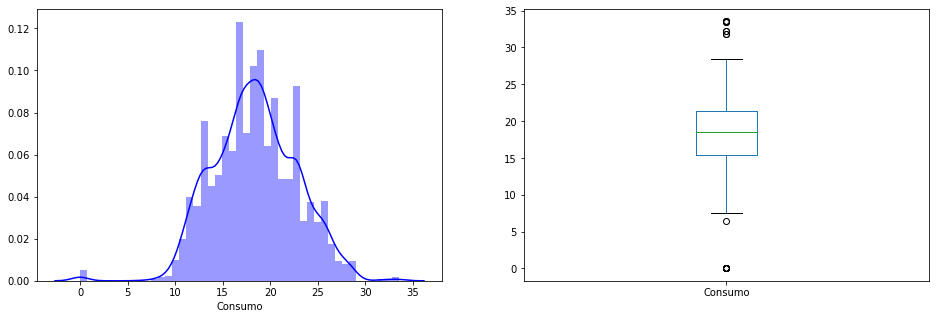

In [125]:
# Consumo
plt.subplot(121)
sns.distplot(car_train_2['Consumo'],color="b");

plt.subplot(122)
car_train_2['Consumo'].plot.box(figsize=(16,5))

plt.show()

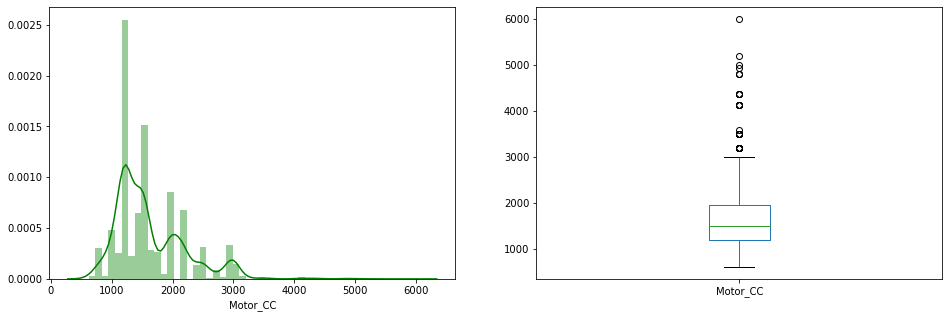

In [126]:
# Motor CC
plt.subplot(121)
sns.distplot(car_train_2['Motor_CC'],color="g");

plt.subplot(122)
car_train_2['Motor_CC'].plot.box(figsize=(16,5))

plt.show() 

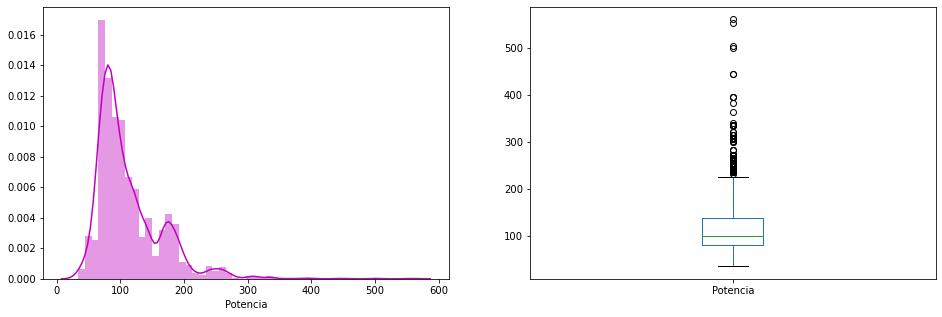

In [127]:
# Potencia
plt.subplot(121)
sns.distplot(car_train_2['Potencia'],color="m");

plt.subplot(122)
car_train_2['Potencia'].plot.box(figsize=(16,5))

plt.show() 

In [128]:
# Consumo vs Precio
car_train_2.loc[car_train_2.Consumo == 0.0]

,id,Nombre,Ciudad,Año,Kilometros,Combustible,Tipo_marchas,Mano,Consumo,Motor_CC,Potencia,Asientos,Precio_cat
455,456.0,Mercedes-Benz C-Class Progressive C 220d,E,2019.0,15369.0,Diesel,Automatic,First,0.0,1950,194.0,5,5
496,497.0,Mercedes-Benz M-Class ML 350 4Matic,E,2016.0,22769.0,Diesel,Automatic,First,0.0,2987,165.0,5,5
957,958.0,Mercedes-Benz M-Class ML 350 4Matic,E,2016.0,27833.0,Diesel,Automatic,First,0.0,2987,165.0,5,5
1077,1078.0,Hyundai Santro Xing GL,B,2008.0,65000.0,Petrol,Manual,Second,0.0,1086,62.0,5,1
1136,1137.0,Hyundai Santro Xing GL,I,2009.0,60170.0,Petrol,Manual,First,0.0,1086,62.0,5,1
1390,1391.0,Mercedes-Benz M-Class ML 350 4Matic,D,2012.0,63000.0,Diesel,Automatic,First,0.0,2987,165.0,5,5
1638,1639.0,Skoda Superb 3.6 V6 FSI,F,2009.0,53000.0,Petrol,Automatic,First,0.0,3597,262.6,5,3
2605,2606.0,Land Rover Freelander 2 TD4 SE,G,2012.0,119203.0,Diesel,Automatic,First,0.0,2179,115.0,5,5
2632,2633.0,Land Rover Freelander 2 TD4 HSE,J,2013.0,72000.0,Diesel,Automatic,First,0.0,2179,115.0,5,5
2934,2935.0,Hyundai Santro Xing GL,H,2011.0,20842.0,Petrol,Manual,First,0.0,1086,62.0,5,2


Outliers

In [129]:
features_ch = ['Kilometros','Precio_cat','Potencia','Consumo','Motor_CC']

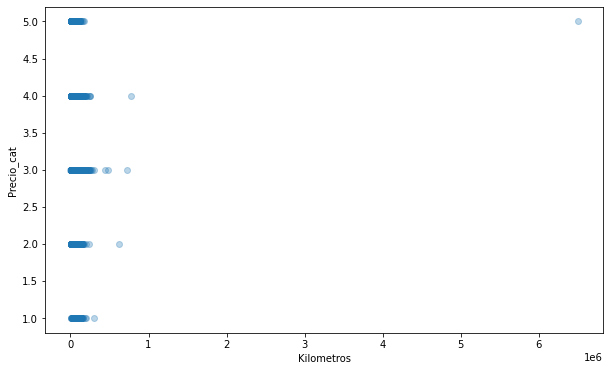

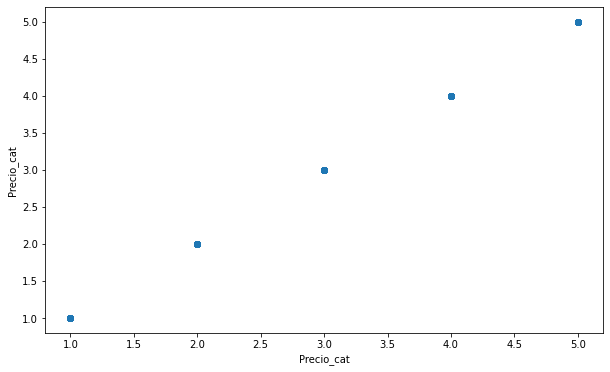

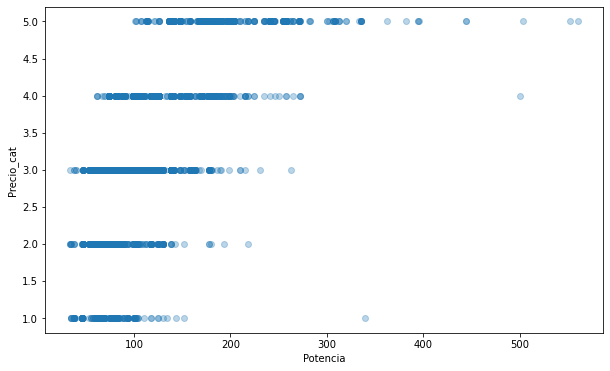

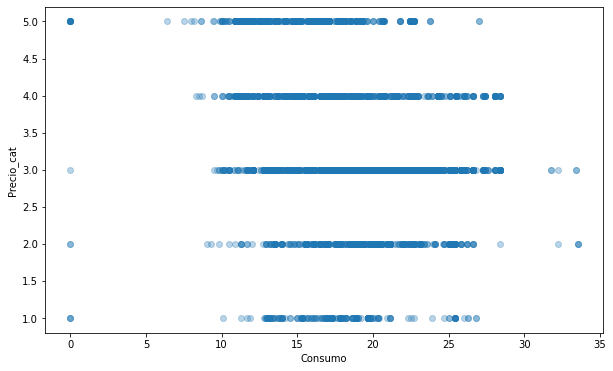

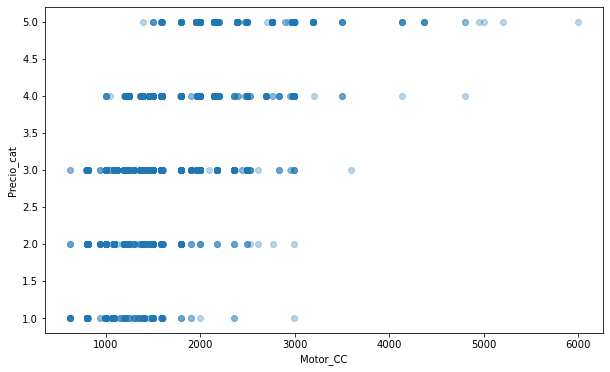

In [21]:
for feature in features_ch:
        plt.figure(figsize=(10,6))
    
        data=car_train_2.copy()
        plt.scatter(data[feature],data['Precio_cat'],alpha=0.3)
        plt.xlabel(feature)
        plt.ylabel('Precio_cat')
        plt.show()

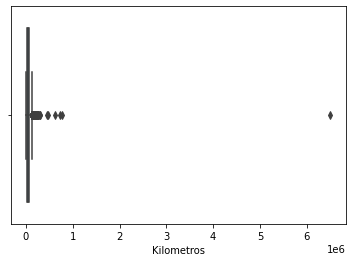

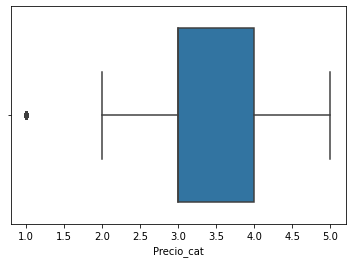

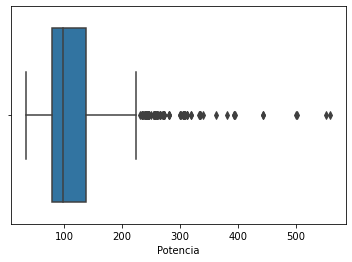

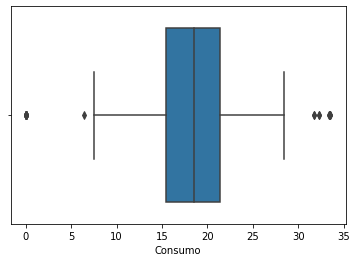

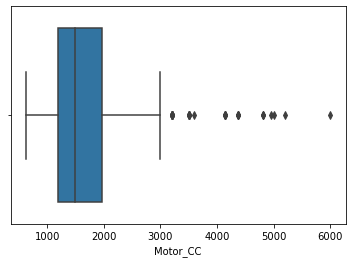

In [22]:
for i in features_ch:
    fig, ax = plt.subplots()
    #plt.xlim(-10,10)
    sns.boxplot(x = i, data = car_train_2, ax = ax)

Tenemos un dataset muy pequeño intentaré eliminar lo menos posible

In [203]:
part = car_train_2['Nombre'].astype(str).str.partition()
car_train_2['Company'] = part[0].str.title()
car_train_2['Car_name'] = part[2]

In [204]:
car_train_2 = car_train_2[car_train_2.Company != 'Bentley']

In [132]:
car_train_2.head()

,id,Nombre,Ciudad,Año,Kilometros,Combustible,Tipo_marchas,Mano,Consumo,Motor_CC,Potencia,Asientos,Precio_cat,Company,Car_name
0,1.0,Maruti Swift Dzire ZDI,G,2012.0,83000.0,Diesel,Manual,First,23.40,1248,74.00,5,3,Maruti,Swift Dzire ZDI
1,2.0,Maruti Wagon R LXI Optional,I,2016.0,4800.0,Petrol,Manual,First,20.51,998,67.04,5,3,Maruti,Wagon R LXI Optional
2,3.0,Mahindra KUV 100 mFALCON D75 K8,F,2016.0,26000.0,Diesel,Manual,First,25.32,1198,77.00,6,3,Mahindra,KUV 100 mFALCON D75 K8
3,4.0,Hyundai i20 1.2 Magna,E,2013.0,56127.0,Petrol,Manual,First,18.50,1197,80.00,5,3,Hyundai,i20 1.2 Magna
4,5.0,Honda Jazz 1.2 SV i VTEC,H,2017.0,41981.0,Petrol,Manual,First,18.70,1199,88.70,5,3,Honda,Jazz 1.2 SV i VTEC


In [205]:
car_train_2.drop(['Nombre','Car_name'], axis = 1, inplace = True)

## Ordinal categorical data

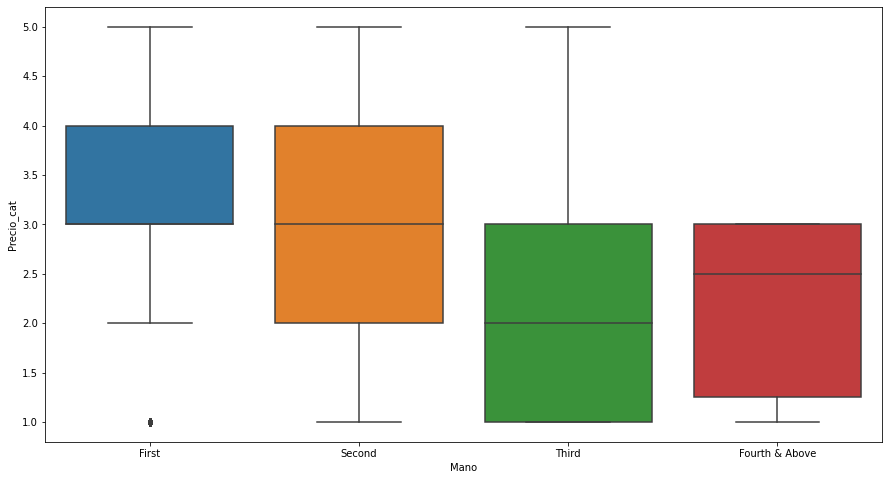

In [183]:
fig_dims = (15, 8)
fig, ax = plt.subplots(figsize = fig_dims)
sns.boxplot(y = "Precio_cat", x = "Mano", data = car_train_2 )

In [210]:
car_train_2.replace({'First':1,'Second':2,'Third':3,'Fourth & Above':4},inplace = True)

## Dummy variables

In [211]:
tipo_marchas = car_train_2[['Tipo_marchas']]
tipo_marchas = pd.get_dummies(tipo_marchas, drop_first=True)

In [33]:
tipo_marchas.head()

,Tipo_marchas_Manual
0,1
1,1
2,1
3,1
4,1


In [212]:
ciudad = car_train_2[['Ciudad']]
ciudad = pd.get_dummies(ciudad, drop_first=True)

In [35]:
ciudad.head()

,Ciudad_C,Ciudad_D,Ciudad_E,Ciudad_F,Ciudad_G,Ciudad_H,Ciudad_I,Ciudad_J,Ciudad_K,Ciudad_L
0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0


In [213]:
company = car_train_2[['Company']]
company = pd.get_dummies(company, drop_first=True)

In [37]:
company.head()

,Company_Bmw,Company_Chevrolet,Company_Datsun,Company_Fiat,Company_Force,Company_Ford,Company_Honda,Company_Hyundai,Company_Isuzu,Company_Jaguar,...,Company_Mini,Company_Mitsubishi,Company_Nissan,Company_Porsche,Company_Renault,Company_Skoda,Company_Tata,Company_Toyota,Company_Volkswagen,Company_Volvo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [214]:
combustible = car_train_2[['Combustible']]
combustible = pd.get_dummies(combustible, drop_first=True)

In [39]:
combustible.head()

,Combustible_Diesel,Combustible_LPG,Combustible_Petrol
0,1,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,0,0,1


In [215]:
car_train_2 = pd.concat([car_train_2, company , ciudad , tipo_marchas, combustible], axis = 1)

In [216]:
car_train_2.head()

,id,Ciudad,Año,Kilometros,Combustible,Tipo_marchas,Mano,Consumo,Motor_CC,Potencia,...,Ciudad_G,Ciudad_H,Ciudad_I,Ciudad_J,Ciudad_K,Ciudad_L,Tipo_marchas_Manual,Combustible_Diesel,Combustible_LPG,Combustible_Petrol
0,1.0,G,2012.0,83000.0,Diesel,Manual,1,23.40,1248,74.00,...,1,0,0,0,0,0,1,1,0,0
1,2.0,I,2016.0,4800.0,Petrol,Manual,1,20.51,998,67.04,...,0,0,1,0,0,0,1,0,0,1
2,3.0,F,2016.0,26000.0,Diesel,Manual,1,25.32,1198,77.00,...,0,0,0,0,0,0,1,1,0,0
3,4.0,E,2013.0,56127.0,Petrol,Manual,1,18.50,1197,80.00,...,0,0,0,0,0,0,1,0,0,1
4,5.0,H,2017.0,41981.0,Petrol,Manual,1,18.70,1199,88.70,...,0,1,0,0,0,0,1,0,0,1


In [217]:
car_train_2.drop(['id', 'Ciudad', 'Combustible', 'Tipo_marchas', 'Company'], axis = 1, inplace = True)

In [218]:
car_train_2.shape

(3945, 48)

## Test data

In [219]:
car_test_2 = car_test_2.drop('Descuento',axis=1)

In [220]:
car_test_2 = car_test_2.dropna()

In [221]:
car_test_2.shape

(1159, 12)

In [222]:
car_test_2['Consumo']=car_test_2.Consumo.astype(str).str.partition()[0].astype('float')
car_test_2['Motor_CC']=car_test_2.Motor_CC.astype(str).str.partition()[0].astype('int')
car_test_2['Potencia']=car_test_2.Potencia.astype(str).str.partition()[0].astype('float')
car_test_2['Asientos']=car_test_2.Asientos.astype('int')

In [151]:
car_test_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1159 entries, 0 to 1158
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            1159 non-null   int64  
 1   Nombre        1159 non-null   object 
 2   Ciudad        1159 non-null   object 
 3   Año           1159 non-null   int64  
 4   Kilometros    1159 non-null   int64  
 5   Combustible   1159 non-null   object 
 6   Tipo_marchas  1159 non-null   object 
 7   Mano          1159 non-null   object 
 8   Consumo       1159 non-null   float64
 9   Motor_CC      1159 non-null   int64  
 10  Potencia      1159 non-null   float64
 11  Asientos      1159 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 117.7+ KB


In [152]:
car_test_2.head()

,id,Nombre,Ciudad,Año,Kilometros,Combustible,Tipo_marchas,Mano,Consumo,Motor_CC,Potencia,Asientos
0,4820,Mercedes-Benz New C-Class C 220 CDI Avantgarde,H,2015,77771,Diesel,Automatic,First,19.27,2143,170.00,5
1,4821,Hyundai i10 Magna 1.1,J,2011,62000,Petrol,Manual,First,19.81,1086,68.05,5
2,4822,Ford Figo Diesel EXI,C,2010,129986,Diesel,Manual,Second,20.00,1399,68.00,5
3,4823,Maruti Swift Dzire VXI Optional,D,2015,49900,Petrol,Manual,First,20.85,1197,83.14,5
4,4824,Maruti Ritz VXI,J,2010,75319,Petrol,Manual,Second,21.10,1197,85.80,5


In [223]:
part = car_test_2['Nombre'].str.partition()
car_test_2['Company'] = part[0].str.title()
car_test_2.head()

,id,Nombre,Ciudad,Año,Kilometros,Combustible,Tipo_marchas,Mano,Consumo,Motor_CC,Potencia,Asientos,Company
0,4820,Mercedes-Benz New C-Class C 220 CDI Avantgarde,H,2015,77771,Diesel,Automatic,First,19.27,2143,170.00,5,Mercedes-Benz
1,4821,Hyundai i10 Magna 1.1,J,2011,62000,Petrol,Manual,First,19.81,1086,68.05,5,Hyundai
2,4822,Ford Figo Diesel EXI,C,2010,129986,Diesel,Manual,Second,20.00,1399,68.00,5,Ford
3,4823,Maruti Swift Dzire VXI Optional,D,2015,49900,Petrol,Manual,First,20.85,1197,83.14,5,Maruti
4,4824,Maruti Ritz VXI,J,2010,75319,Petrol,Manual,Second,21.10,1197,85.80,5,Maruti


In [224]:
car_test_2.Company.nunique()

27

In [225]:
car_test_2.Tipo_marchas.nunique()

2

In [227]:
car_test_2.Combustible.nunique()

4

In [228]:
car_test_2.Ciudad.nunique()

11

In [229]:
car_test_2.replace({'First':1,'Second':2,'Third':3,'Fourth & Above':4},inplace = True)

In [230]:
#as Transmission  is an nominal varible lets perform onehotencoding
tipo_marchas = car_test_2[["Tipo_marchas"]]
tipo_marchas = pd.get_dummies(tipo_marchas,drop_first=True)

# Location
ciudad = car_test_2[["Ciudad"]]
ciudad = pd.get_dummies(ciudad,drop_first=True)

#company
company = car_test_2[["Company"]]
company = pd.get_dummies(company ,drop_first=True)

#fuel_type
combustible = car_test_2[["Combustible"]]
combustible = pd.get_dummies(combustible,drop_first=True)

In [231]:
car_test_2 = pd.concat([car_test_2, company , ciudad , tipo_marchas, combustible ], axis = 1)

In [232]:
car_test_2.drop(['Tipo_marchas', 'Ciudad', 'Company', 'Combustible', 'Nombre'], axis = 1, inplace = True)

In [233]:
car_test_2.shape

(1159, 48)

In [234]:
car_test_2.head()

,id,Año,Kilometros,Mano,Consumo,Motor_CC,Potencia,Asientos,Company_Audi,Company_Bmw,...,Ciudad_G,Ciudad_H,Ciudad_I,Ciudad_J,Ciudad_K,Ciudad_L,Tipo_marchas_Manual,Combustible_Diesel,Combustible_LPG,Combustible_Petrol
0,4820,2015,77771,1,19.27,2143,170.00,5,0,0,...,0,1,0,0,0,0,0,1,0,0
1,4821,2011,62000,1,19.81,1086,68.05,5,0,0,...,0,0,0,1,0,0,1,0,0,1
2,4822,2010,129986,2,20.00,1399,68.00,5,0,0,...,0,0,0,0,0,0,1,1,0,0
3,4823,2015,49900,1,20.85,1197,83.14,5,0,0,...,0,0,0,0,0,0,1,0,0,1
4,4824,2010,75319,2,21.10,1197,85.80,5,0,0,...,0,0,0,1,0,0,1,0,0,1


## Feature Scaling

In [235]:
## Feature scaling
from sklearn.preprocessing import StandardScaler

In [236]:
scaled_features_train = car_train_2.copy()
scaled_features_test = car_test_2.copy() 

In [237]:
col_names = ['Kilometros','Potencia','Consumo','Motor_CC']

In [238]:
features_train = scaled_features_train[col_names]
scaler = StandardScaler().fit(features_train.values)
features_train = scaler.transform(features_train.values)

In [239]:
scaled_features_train[col_names] = features_train

In [240]:
scaled_features_train.head()

,Año,Kilometros,Mano,Consumo,Motor_CC,Potencia,Asientos,Precio_cat,Company_Bmw,Company_Chevrolet,...,Ciudad_G,Ciudad_H,Ciudad_I,Ciudad_J,Ciudad_K,Ciudad_L,Tipo_marchas_Manual,Combustible_Diesel,Combustible_LPG,Combustible_Petrol
0,2012.0,0.221697,1,1.148874,-0.638762,-0.751974,5,3,0,0,...,1,0,0,0,0,0,1,1,0,0
1,2016.0,-0.490385,1,0.485447,-1.067971,-0.887019,5,3,0,0,...,0,0,1,0,0,0,1,0,0,1
2,2016.0,-0.297339,1,1.589628,-0.724604,-0.693764,6,3,0,0,...,0,0,0,0,0,0,1,1,0,0
3,2013.0,-0.023006,1,0.024032,-0.726321,-0.635555,5,3,0,0,...,0,0,0,0,0,0,1,0,0,1
4,2017.0,-0.151818,1,0.069944,-0.722887,-0.466748,5,3,0,0,...,0,1,0,0,0,0,1,0,0,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feac257e0d0>,
      dtype=object)

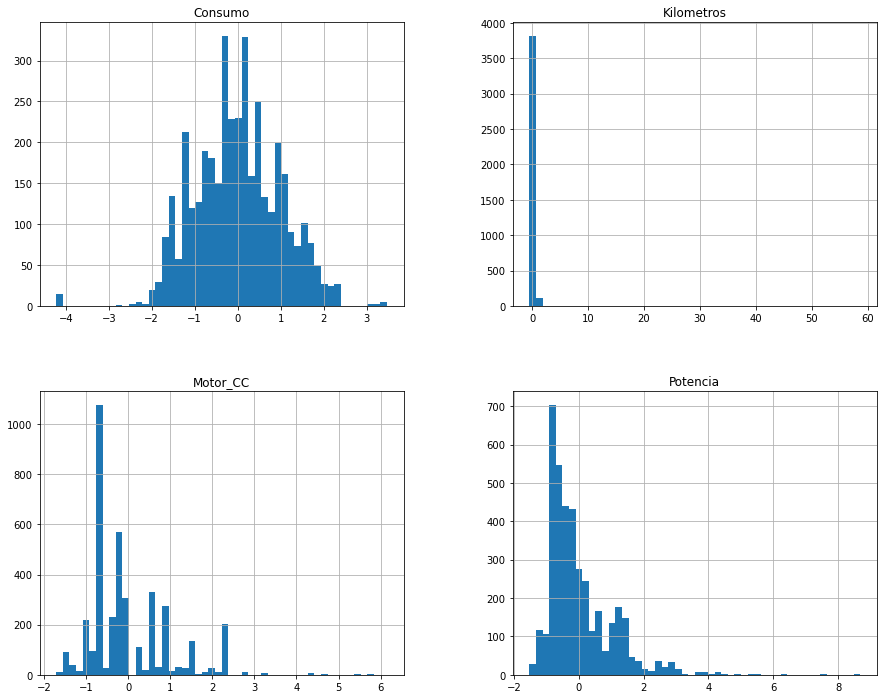

In [77]:
scaled_features_train[col_names].hist(bins=50,figsize=(15,12))

In [241]:
features_test = scaled_features_test[col_names]
scaler = StandardScaler().fit(features_test.values)
features_test = scaler.transform(features_test.values)

In [242]:
scaled_features_test[col_names] = features_test

In [110]:
scaled_features_test.head()

,Año,Kilometros,Mano,Consumo,Motor_CC,Potencia,Asientos,Company_Audi,Company_Bmw,Company_Chevrolet,...,Ciudad_G,Ciudad_H,Ciudad_I,Ciudad_J,Ciudad_K,Ciudad_L,Tipo_marchas_Manual,Combustible_Diesel,Combustible_LPG,Combustible_Petrol
0,2015,0.515357,1,0.315477,0.782812,0.928945,5,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,2011,0.073480,1,0.437839,-0.859256,-0.772356,5,0,0,0,...,0,0,0,1,0,0,1,0,0,1
2,2010,1.978332,2,0.480893,-0.373005,-0.773190,5,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,2015,-0.265541,1,0.673499,-0.686816,-0.520540,5,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,2010,0.446656,2,0.730148,-0.686816,-0.476151,5,0,0,0,...,0,0,0,1,0,0,1,0,0,1


## Model

In [243]:
y = scaled_features_train['Precio_cat']
X = scaled_features_train.drop('Precio_cat', axis=1)

In [244]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)

In [245]:
## Regresión lineal

In [246]:
linear_reg = LinearRegression()
linear_reg_score = cross_val_score(linear_reg, X_train, y_train, cv=5)

In [247]:
print(linear_reg_score.mean(), linear_reg_score.std())

0.81615277092984 0.016238927405221266


In [248]:
linear_reg.fit(X_train, y_train)
y_pred = linear_reg.predict(X_test)
print("Accuracy on Training set: ",linear_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",linear_reg.score(X_test,y_test))

Accuracy on Traing set:  0.8264191416506916
Accuracy on Testing set:  0.8096951336472078


In [249]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

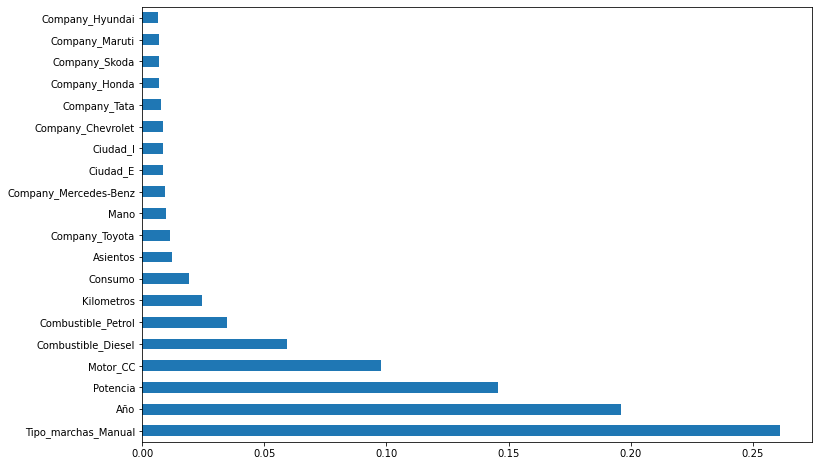

In [250]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [ ]:
## Regresión Logística

In [101]:
lr = LogisticRegression()

lr_score = cross_val_score(lr, X_train, y_train, cv=5)

/Users/davidalbertomartinvela/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/davidalbertomartinvela/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

In [102]:
print(lr_score.mean(), lr_score.std())

0.6013972196032016 0.009925063585505671


In [ ]:
# Random Forest

In [251]:
rfg = RandomForestRegressor()
rfg_score = cross_val_score(rfg, X_train, y_train, cv=5)

In [252]:
print(rfg_score.mean(), rfg_score.std())

0.8591449513454597 0.0055127951618190955


In [253]:
rfg.fit(X_train, y_train)
y_pred= rfg.predict(X_test)
print("Accuracy on Training set: ",rfg.score(X_train,y_train))
print("Accuracy on Testing set: ",rfg.score(X_test,y_test))

Accuracy on Traing set:  0.9811038674661235
Accuracy on Testing set:  0.8464895333412119


In [254]:
print("\t\tError Table")
print('Mean Absolute Error      : ', mean_absolute_error(y_test, y_pred))
print('Mean Squared  Error      : ', mean_squared_error(y_test, y_pred))
print('Root Mean Squared  Error : ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R Squared Error          : ', metrics.r2_score(y_test, y_pred))

		Error Table
Mean Absolute Error      :  0.24201520912547528
Mean Squared  Error      :  0.16692991128010137
Root Mean Squared  Error :  0.4085705707464763
R Squared Error          :  0.8464895333412119


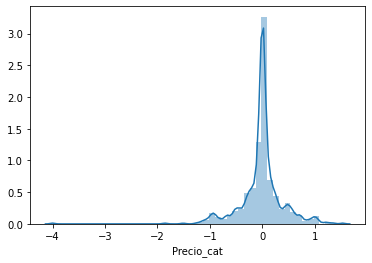

In [255]:
sns.distplot(y_test-y_pred)
plt.show()

## Generando el fichero para Kaggle

In [256]:
tests_ids_2 = scaled_features_test['id']
del scaled_features_test['id']

predict_2 = rfg.predict(scaled_features_test)
# Generamos 
df_result = pd.DataFrame({'id': tests_ids_2, 'Precio_cat': np.around(predict_2).astype(int) })
df_result.to_csv("mis_resultados_2.csv", index=False)

In [258]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [259]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [260]:
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rfg, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [261]:
rf_random.fit(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.6s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   2.4s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.0s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.0min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [262]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [263]:
rfg_best = RandomForestRegressor(n_estimators=1000,min_samples_split=2,min_samples_leaf=1,max_features='sqrt',max_depth=25)

In [266]:
rfg_best_score = cross_val_score(rfg_best, X_train, y_train, cv=5)

In [267]:
print(rfg_best_score.mean(), rfg_best_score.std())

0.8634724419793154 0.005436514442607611


In [268]:
rfg_best.fit(X_train, y_train)
y_pred= rfg_best.predict(X_test)
print("Accuracy on Training set: ",rfg_best.score(X_train,y_train))
print("Accuracy on Testing set: ",rfg_best.score(X_test,y_test))

Accuracy on Traing set:  0.9817866648165791
Accuracy on Testing set:  0.8517814328406582


In [270]:
print("\t\tError Table")
print('Mean Absolute Error      : ', mean_absolute_error(y_test, y_pred))
print('Mean Squared  Error      : ', mean_squared_error(y_test, y_pred))
print('Root Mean Squared  Error : ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R Squared Error          : ', metrics.r2_score(y_test, y_pred))

		Error Table
Mean Absolute Error      :  0.26031193376704587
Mean Squared  Error      :  0.16117540910723469
Root Mean Squared  Error :  0.4014665728391776
R Squared Error          :  0.8517814328406582
